# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import json
import requests

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
req = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
file = open("image_predictions.tsv", "wb")
file.write(req.content)
file.close()

In [5]:
df2 = pd.read_csv("image_predictions.tsv", sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
data_list = []
for line in open("tweet-json.txt", "r"):
    data = json.loads(line)
    data_list.append({"tweet_id":data["id"],
                      "retweet_count": data["retweet_count"],
                      "favorite_count": data["favorite_count"]})

In [7]:
import pandas as pd
df3 = pd.DataFrame(data_list, columns = ["tweet_id", "retweet_count", "favorite_count"])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Visual Assessment

In [8]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Programmatic Assessment

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [14]:
df[df['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [18]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
323,834089966724603904,NaN,NaN,2017-02-21 17:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,NaN,NaN,NaN,https://twitter.com/stevekopack/status/8340866...,10,10,None,doggo,None,None,None
1272,709225125749587968,NaN,NaN,2016-03-14 03:50:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709225125...,11,10,Walker,None,None,None,None
2262,667546741521195010,NaN,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,None,None,None
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None
1175,720043174954147842,NaN,NaN,2016-04-13 00:17:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a Snowy Swiss Mountain F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720043174...,11,10,Neptune,None,None,None,None


In [19]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True
414,674008982932058114,https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg,1,jigsaw_puzzle,0.970810,False,prayer_rug,0.011048,False,quill,0.008432,False
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
613,680145970311643136,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,1,miniature_poodle,0.457117,True,toy_poodle,0.226481,True,Maltese_dog,0.067682,True


In [20]:
df3.sample(5)

,tweet_id,retweet_count,favorite_count
1195,717009362452090881,1102,3583
979,749417653287129088,1904,6721
1999,672482722825261057,665,1221
1146,726887082820554753,1677,4195
698,786286427768250368,3352,8930


In [21]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [22]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [23]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [26]:
df3.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [27]:
sum(df.duplicated())

0

In [28]:
sum(df2.duplicated())

0

In [29]:
sum(df3.duplicated())

0

In [30]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [31]:
df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
df3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [33]:
all_columns = pd.Series(list(df) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [34]:
df2.p1.nunique()

378

In [35]:
print(df2.p1_dog.nunique())
print(df2.p1_dog.unique())
print(df2.p2_dog.nunique())
print(df2.p2_dog.unique())
print(df2.p3_dog.nunique())
print(df2.p3_dog.unique())

2
[ True False]
2
[ True False]
2
[ True False]


In [36]:
print(df2.p1_conf.nunique())
print(df2.p1_conf.unique())
print(df2.p2_conf.nunique())
print(df2.p2_conf.unique())
print(df2.p3_conf.nunique())
print(df2.p3_conf.unique())

2006
[0.465074  0.506826  0.596461  ... 0.716012  0.323581  0.0970486]
2004
[0.156665  0.0741917 0.138584  ... 0.078253  0.0906465 0.0858511]
2006
[0.0614285 0.07201   0.116197  ... 0.0313789 0.0689569 0.07611  ]


In [37]:
print(df.doggo.unique())
print(df.floofer.unique())
print(df.pupper.unique())
print(df.puppo.unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


In [38]:
print(df.doggo.value_counts())
print(df.floofer.value_counts())
print(df.pupper.value_counts())
print(df.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


### Quality issues 
1. reversed arrangement of rows in the twitter api dataframe
2. Missing information - drop `in_reply_to_status_id` column on WeRateDogs twitter archive
3. Missing information - drop  `in_reply_to user_id` column on WeRateDogs twitter archive
4. Missing Information - drop `retweeted_status_id`  on WerateDogs twitter archive
5. Missing information - drop `retweeted_status_user_id` on WeRateDogs twitter archive
6. Missing information - drop  `retweeted_status_timestamp` on WeRateDogs twitter archive
7. Unneccesary information - drop  `source` in the WeRateDogs csv file is an unnecessary information
8. duplicated information - drop `expanded urls` on WeRateDogs twitter archive has the same information as  tweet_id.
9. Rename columns(p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog) on the image prediction dataframe
10. Strip off excess information on the timestammp column to just date

### Tidiness issues
1. Converted the column names('doggo', 'floofer', 'pupper', 'puppo') into two columns and gave them new columns name.
2. I merged  the three dataframes after cleaning into a a single dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
df_clean = df.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Issue #1:

#### Define: 
- Reversed arrangement of rows in the image dataframe.

#### Code

In [40]:
df2_new = df2_clean.sort_index(axis=0, ascending=False)

#### Test

In [41]:
df2_new.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [42]:
df2_new.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Issue #2:

#### Define: 
- Missing information in  `in_reply_to status_id`  on `WeRateDogs twitter archive` and then drop it


#### Code

In [43]:
df_clean.drop(['in_reply_to_status_id'], axis=1, inplace=True)

#### Test

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  floofer                     2356 

### Issue #3:

#### Define: 
- Missing information in  `in_reply_to user_id`  on `WeRateDogs twitter archive` and then drop it

### Code

In [45]:
df_clean.drop(['in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2297 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  doggo                       2356 non-null   object 
 12  floofer                     2356 non-null   object 
 13  pupper                      2356 

### Issue #4:

#### Define: 
- Missing information - drop `retweeted_status_id`  on `WeRateDogs twitter archive`

#### Code

In [47]:
df_clean.drop(['retweeted_status_id'], axis=1, inplace=True)

#### Test

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_user_id    181 non-null    float64
 5   retweeted_status_timestamp  181 non-null    object 
 6   expanded_urls               2297 non-null   object 
 7   rating_numerator            2356 non-null   int64  
 8   rating_denominator          2356 non-null   int64  
 9   name                        2356 non-null   object 
 10  doggo                       2356 non-null   object 
 11  floofer                     2356 non-null   object 
 12  pupper                      2356 non-null   object 
 13  puppo                       2356 

### Issue #5:

#### Define: 
- Missing information - drop `retweeted_status_user_id`  on `WeRateDogs twitter archive`

#### Code

In [49]:
df_clean.drop(['retweeted_status_user_id'], axis=1, inplace=True)

#### Test

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   int64 
 1   timestamp                   2356 non-null   object
 2   source                      2356 non-null   object
 3   text                        2356 non-null   object
 4   retweeted_status_timestamp  181 non-null    object
 5   expanded_urls               2297 non-null   object
 6   rating_numerator            2356 non-null   int64 
 7   rating_denominator          2356 non-null   int64 
 8   name                        2356 non-null   object
 9   doggo                       2356 non-null   object
 10  floofer                     2356 non-null   object
 11  pupper                      2356 non-null   object
 12  puppo                       2356 non-null   object
dtypes: int64(3), object(10)
memory usage: 239.4+ KB


### Issue #6:

#### Define: 
- Missing information - drop `retweeted_status_timestamp`  on `WeRateDogs twitter archive`

#### Code

In [51]:
df_clean.drop(['retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #7:

#### Define:
- This column only tells the type of device it was used to make that tweet which I find as an Unneccesary information so we can drop  `source` in the WeRateDogs csv file


#### Code

In [53]:
df_clean.drop(['source'], axis=1, inplace=True)

#### Test

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   expanded_urls       2297 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


### Issue #8:

#### Define: 
- duplicated information - drop `expanded urls` on WeRateDogs twitter archive has the same information as  tweet_id.

#### Code

In [55]:
df_clean.drop(['expanded_urls'], axis=1, inplace=True)

#### Test

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                2356 non-null   object
 6   doggo               2356 non-null   object
 7   floofer             2356 non-null   object
 8   pupper              2356 non-null   object
 9   puppo               2356 non-null   object
dtypes: int64(3), object(7)
memory usage: 184.2+ KB


In [94]:
df.shape

(2356, 17)

In [95]:
df_clean.shape

(2356, 10)

### Issue #9:

#### Define:
- Rename columns(p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog) in the image prediction dataframe

#### Code

In [57]:
df2_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [58]:
df2_clean = df2_clean.rename(columns = {'p1':'firstPrediction', 'p2':'secondPrediction','p3':'thirdPrediction',
                                      'p1_conf': 'firstPredictionConfidence', 'p2_conf':'secondPredictionConfidence', 
                                      'p3_conf':'thirdPredictionConfidence', 'p1_dog':'firstDogPrediction',
                                      'p2_dog':'secondDogPrediction', 'p3_dog':'thirdDogPrediction'})

### Test

In [59]:
df2_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'firstPrediction',
       'firstPredictionConfidence', 'firstDogPrediction', 'secondPrediction',
       'secondPredictionConfidence', 'secondDogPrediction', 'thirdPrediction',
       'thirdPredictionConfidence', 'thirdDogPrediction'],
      dtype='object')

In [60]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   jpg_url                     2075 non-null   object 
 2   img_num                     2075 non-null   int64  
 3   firstPrediction             2075 non-null   object 
 4   firstPredictionConfidence   2075 non-null   float64
 5   firstDogPrediction          2075 non-null   bool   
 6   secondPrediction            2075 non-null   object 
 7   secondPredictionConfidence  2075 non-null   float64
 8   secondDogPrediction         2075 non-null   bool   
 9   thirdPrediction             2075 non-null   object 
 10  thirdPredictionConfidence   2075 non-null   float64
 11  thirdDogPrediction          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #10:

#### Define:
- Strip off excess information on the timestammp column to just date.

#### Code

In [62]:
df_clean['timestamp'] = df_clean['timestamp'].str[:10]

#### Test

In [63]:
df_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Tidiness

### Issue #11:

#### Define:
- Convert the column names('doggo', 'floofer', 'pupper', 'puppo') into a column and give it a new name

#### Code

In [64]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [65]:
df_clean2 = pd.melt(df_clean, id_vars=['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name'], 
                    value_vars=['doggo', "floofer", 'pupper', 'puppo'],
                    var_name=["Dog_stage"], value_name="Is_stage_available?")

#### Test

In [66]:
df_clean2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_id             9424 non-null   int64 
 1   timestamp            9424 non-null   object
 2   text                 9424 non-null   object
 3   rating_numerator     9424 non-null   int64 
 4   rating_denominator   9424 non-null   int64 
 5   name                 9424 non-null   object
 6   Dog_stage            9424 non-null   object
 7   Is_stage_available?  9424 non-null   object
dtypes: int64(3), object(5)
memory usage: 589.1+ KB


### Issue #12:

#### Define:
- Merging the three dataframes after cleaning into a dataframe.

#### Code

### Merge the dataframes 

In [67]:
merged_df = pd.merge(df_clean2, df2_clean, on="tweet_id", how="left")

In [68]:
merged_df2 = pd.merge(merged_df, df3_clean, on="tweet_id",how="left")

#### Test

In [70]:
merged_df2.shape

(9424, 21)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

#### Store the merged dataframe in a csvfile

In [71]:
merged_df2.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
master_df = pd.read_csv("twitter_archive_master.csv")

In [73]:
master_df.shape

(9424, 21)

In [74]:
master_df.isnull().sum()

tweet_id                         0
timestamp                        0
text                             0
rating_numerator                 0
rating_denominator               0
name                             0
Dog_stage                        0
Is_stage_available?              0
jpg_url                       1124
img_num                       1124
firstPrediction               1124
firstPredictionConfidence     1124
firstDogPrediction            1124
secondPrediction              1124
secondPredictionConfidence    1124
secondDogPrediction           1124
thirdPrediction               1124
thirdPredictionConfidence     1124
thirdDogPrediction            1124
retweet_count                    8
favorite_count                   8
dtype: int64

In [75]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   timestamp                   9424 non-null   object 
 2   text                        9424 non-null   object 
 3   rating_numerator            9424 non-null   int64  
 4   rating_denominator          9424 non-null   int64  
 5   name                        9424 non-null   object 
 6   Dog_stage                   9424 non-null   object 
 7   Is_stage_available?         9424 non-null   object 
 8   jpg_url                     8300 non-null   object 
 9   img_num                     8300 non-null   float64
 10  firstPrediction             8300 non-null   object 
 11  firstPredictionConfidence   8300 non-null   float64
 12  firstDogPrediction          8300 non-null   object 
 13  secondPrediction            8300 

In [76]:
round(master_df.groupby('Dog_stage')['retweet_count'].median())

Dog_stage
doggo      1474.0
floofer    1474.0
pupper     1474.0
puppo      1474.0
Name: retweet_count, dtype: float64

In [77]:
round(master_df.groupby('Dog_stage')['retweet_count'].mean())

Dog_stage
doggo      3165.0
floofer    3165.0
pupper     3165.0
puppo      3165.0
Name: retweet_count, dtype: float64

In [78]:
round(master_df.groupby('Dog_stage')['favorite_count'].median())

Dog_stage
doggo      3604.0
floofer    3604.0
pupper     3604.0
puppo      3604.0
Name: favorite_count, dtype: float64

In [79]:
round(master_df.groupby('Dog_stage')['favorite_count'].mean())

Dog_stage
doggo      8081.0
floofer    8081.0
pupper     8081.0
puppo      8081.0
Name: favorite_count, dtype: float64

In [80]:
# Convert timestamp from 'object' type to 'datetime64[ns]'
#import datetime
#from time import  strftime
#df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date.astype('datetime64[ns]')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [81]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   timestamp                   9424 non-null   object 
 2   text                        9424 non-null   object 
 3   rating_numerator            9424 non-null   int64  
 4   rating_denominator          9424 non-null   int64  
 5   name                        9424 non-null   object 
 6   Dog_stage                   9424 non-null   object 
 7   Is_stage_available?         9424 non-null   object 
 8   jpg_url                     8300 non-null   object 
 9   img_num                     8300 non-null   float64
 10  firstPrediction             8300 non-null   object 
 11  firstPredictionConfidence   8300 non-null   float64
 12  firstDogPrediction          8300 non-null   object 
 13  secondPrediction            8300 

In [82]:
master_df.Dog_stage.unique()

array(['doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [83]:
master_df.name.nunique()

957

In [84]:
master_df.firstPrediction.nunique()

378

In [85]:
master_df.secondPrediction.nunique()

405

In [86]:
master_df.thirdPrediction.nunique()

408

In [87]:
print(master_df.firstDogPrediction.nunique())
print(master_df.firstDogPrediction.unique())
print(master_df.secondDogPrediction.nunique())
print(master_df.secondDogPrediction.unique())
print(master_df.thirdDogPrediction.nunique())
print(master_df.thirdDogPrediction.unique())

2
[False True nan]
2
[False True nan]
2
[False True nan]


In [88]:
print(master_df.firstDogPrediction.value_counts())
print(master_df.secondDogPrediction.value_counts())
print(master_df.thirdDogPrediction.value_counts())

True     6128
False    2172
Name: firstDogPrediction, dtype: int64
True     6212
False    2088
Name: secondDogPrediction, dtype: int64
True     5996
False    2304
Name: thirdDogPrediction, dtype: int64


### Insights:
1. For the first, second and third Dog Predictions, the result showed that they made more correct predictions than incorrect predictione because there were more `Trues` than `Falses`.

2. The Mean favourite counts and retweets count is the same for all the stages of the Dog.

3. The median favourite counts and retweets count is also the same for all the stages of the Dog

### Visualization

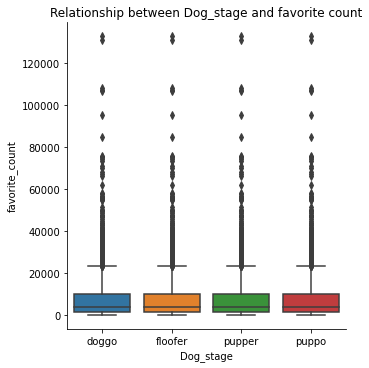

In [89]:
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt

sns.catplot(x="Dog_stage", y="favorite_count", 
            data=master_df, kind="box")
plt.title("Relationship between Dog_stage and favorite count")
plt.show()

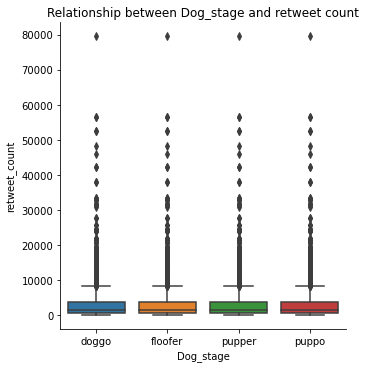

In [90]:
sns.catplot(x="Dog_stage", y="retweet_count", 
            data=master_df, kind="box")
plt.title("Relationship between Dog_stage and retweet count")
plt.show()

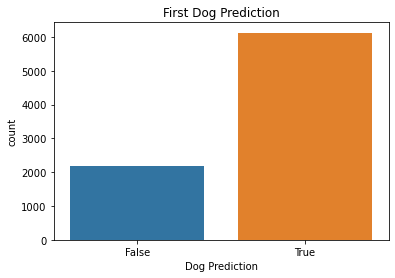

In [91]:
#plt.figure(figsize=(16,4))
#plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(master_df.firstDogPrediction))
ax.set_title("First Dog Prediction")
ax.set_xlabel("Dog Prediction")
plt.show()

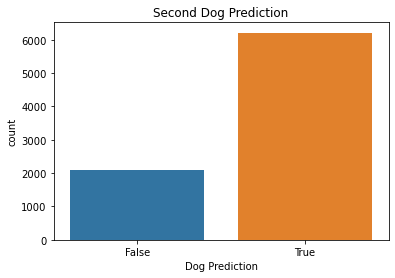

In [92]:
ax = sns.countplot(x=np.sort(master_df.secondDogPrediction))
ax.set_title("Second Dog Prediction")
ax.set_xlabel("Dog Prediction")
plt.show()

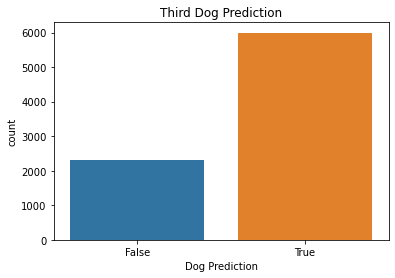

In [93]:
ax = sns.countplot(x=np.sort(master_df.thirdDogPrediction))
ax.set_title("Third Dog Prediction")
ax.set_xlabel("Dog Prediction")
plt.show()